In [1]:
## importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
## loading data from the file
dataset = pd.read_csv('train.csv')

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object

There are two columns (Age, Cabin) with missing values, Let treat missing values

In [6]:
dataset.Age.isnull().sum()/ len(dataset.Age)

0.19865319865319866

0.19865319865319866

In [7]:
dataset.Cabin.isnull().sum()/ len(dataset.Cabin)

0.7710437710437711

0.7710437710437711

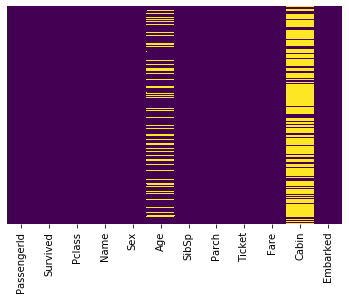

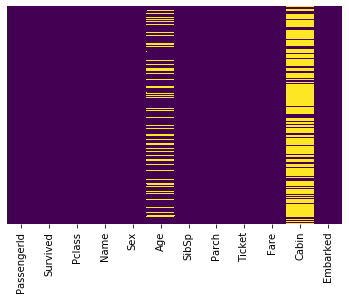

In [8]:
sns.heatmap(dataset.isna(), yticklabels=False, cbar=False, cmap='viridis')

There are lot of missing values in Cabin column which is 77% of data. And there is less than  20% data is missed in Age column. So we can drop Cabin column and treat missing values for Age column, due to age is descrete data we can use median value for treating missing values.

In [9]:
## dropping cabin column
dataset.drop('Cabin', axis=1, inplace=True)

In [10]:
## filling missing values of Age column with median value
dataset.Age.fillna(dataset.Age.median(), axis=0, inplace=True)

In [11]:
## Due to Embarked is categorical feature we will use mode value to fill the missing values
dataset.Embarked.fillna(dataset.Embarked.mode()[0], axis=0, inplace=True)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float6

### EDA
Lets start our Exploratory Data analasys.

There are 11 columns after missing value treatment

**PassengerId:** may not create any impact on prediction, So we can drop this column for training.

**Survived:** We are predicting who will survive, so this column is the dependent feature/ outpul labels

**Name:** may not create any impact on prediction, So we can drop this column for training.

**Ticket:** may not create any impact on prediction, So we can drop this column for training.

**Fare:** this column may co-related with Pclass, we will decide later in EDA whether it should drop or not.

**Embarked:** This will not impact on prediction because Embarked may define location but not survival prediction

In [13]:
## dropping less/no impactable columns
dataset.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Embarked'], axis=1, inplace=True)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [15]:
def age_grouping(data):
    if(data<4):
        return 'Inf_toddler'
    elif(data<=12):
        return 'children'
    elif(data<20):
        return 'teens'
    elif(data<45):
        return 'young_middle'
    else:
        return 'elders'

In [16]:
dataset['Age_group'] = dataset.Age.apply(age_grouping)

In [17]:
dataset.drop('Age', axis=1, inplace=True)

In [18]:
dataset.head()

,Survived,Pclass,Sex,SibSp,Parch,Age_group
0,0,3,male,1,0,young_middle
1,1,1,female,1,0,young_middle
2,1,3,female,0,0,young_middle
3,1,1,female,1,0,young_middle
4,0,3,male,0,0,young_middle


,Survived,Pclass,Sex,SibSp,Parch,Age_group
0,0,3,male,1,0,young_middle
1,1,1,female,1,0,young_middle
2,1,3,female,0,0,young_middle
3,1,1,female,1,0,young_middle
4,0,3,male,0,0,young_middle


In [19]:
dataset.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

Male passengers are almost double the female passengers

In [20]:
dataset.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Most of the Passengers were travelling in 3rd class.

In [21]:
dataset.Age_group.value_counts()

young_middle    612
elders          115
teens            95
children         39
Inf_toddler      30
Name: Age_group, dtype: int64

young_middle    612
elders          115
teens            95
children         39
Inf_toddler      30
Name: Age_group, dtype: int64

Passengers with age higher than 45 are more than other age group

In [22]:
dataset.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
dataset.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

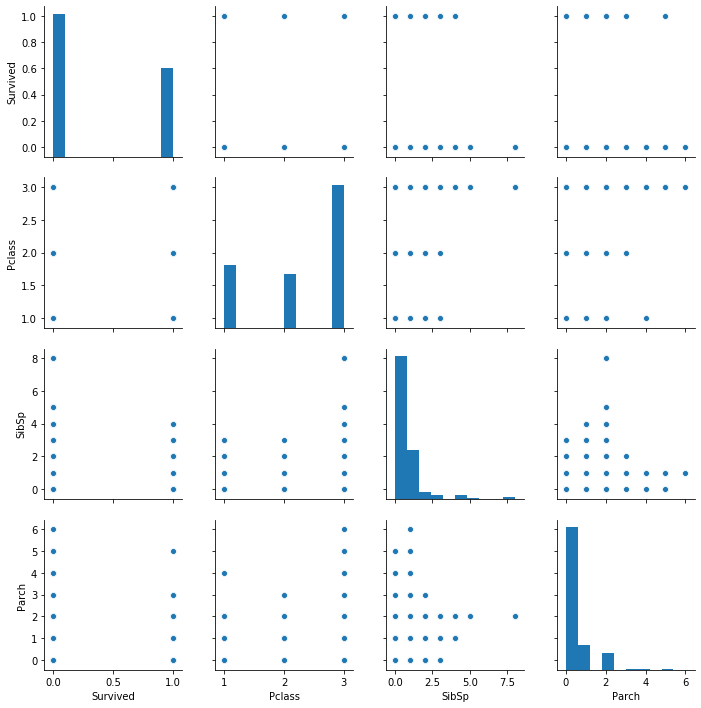

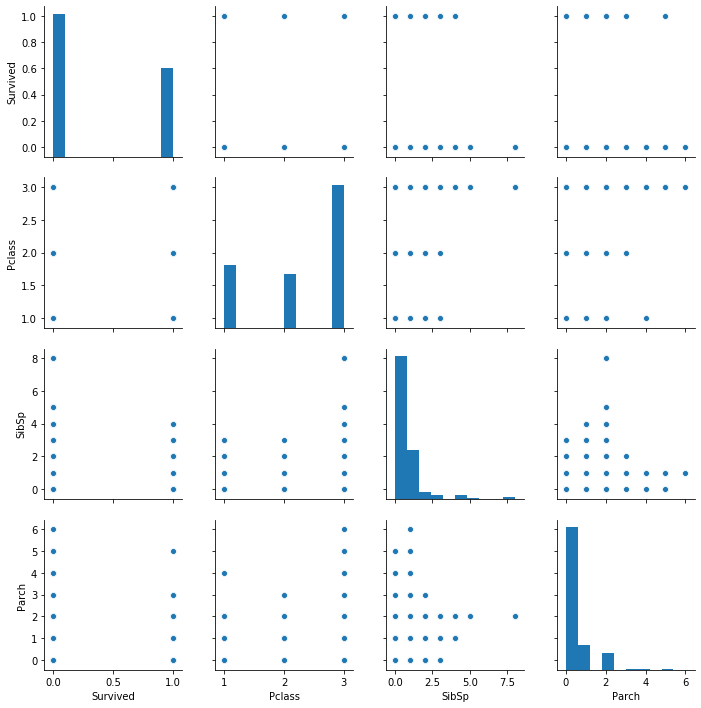

In [24]:
sns.pairplot(data=dataset)

Pairplot not giving the clear picture because there are categorical and descrete values. Count/bar plot may be a better option to visualize it.

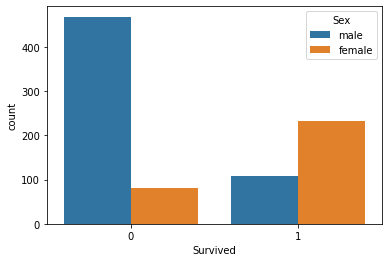

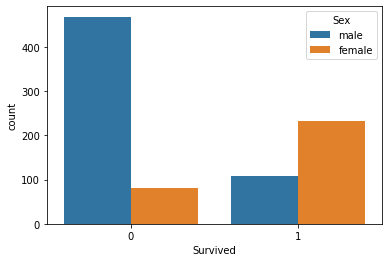

In [25]:
sns.countplot(data=dataset, x='Survived', hue='Sex')

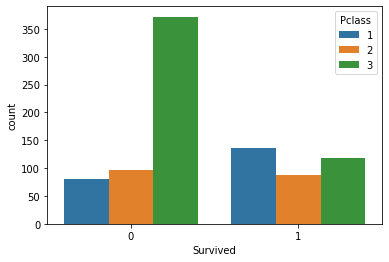

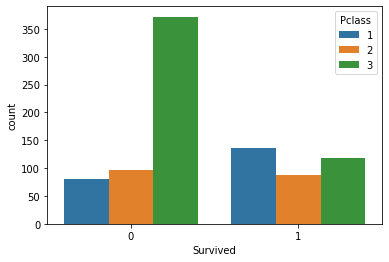

In [26]:
sns.countplot(data=dataset, x='Survived', hue='Pclass')

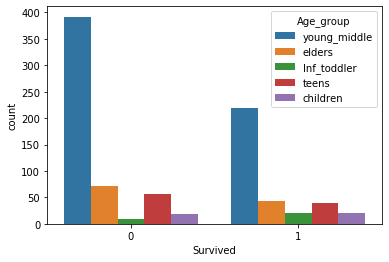

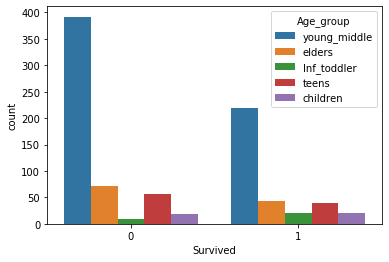

In [27]:
sns.countplot(data=dataset, x='Survived', hue='Age_group')

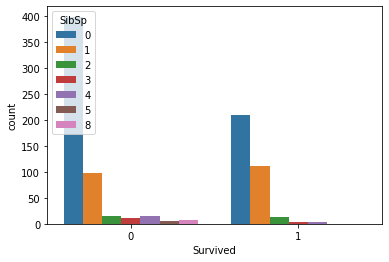

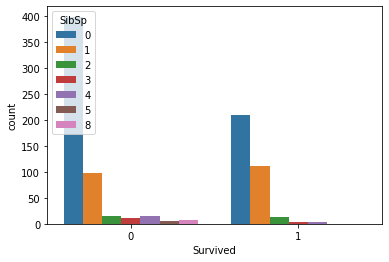

In [28]:
sns.countplot(data=dataset, x='Survived', hue='SibSp')

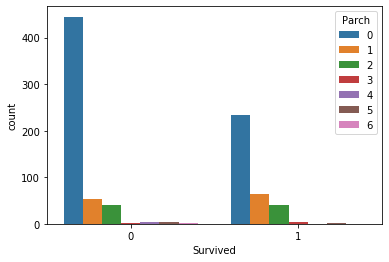

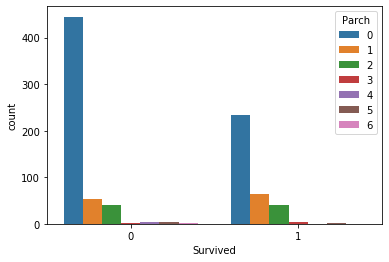

In [29]:
sns.countplot(data=dataset, x='Survived', hue='Parch')

From the above visuals Most survived passengers are

**Gender**: Female

**Pclass**: 1st class and then 3rd class passengers are more survived, but coming to ratio class 1 have good ratio of survived.

**Age group**: most passengers survived are young and middle aged people.

.

In [30]:
## Sepearting features and labels
X = dataset.iloc[:, 1:]
Y = dataset.iloc[:, [0]]

In [31]:
X = pd.get_dummies(X, drop_first=True)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
lr.score(X_train, Y_train)

0.8083832335329342

0.8083832335329342

In [36]:
lr.score(X_test, Y_test)

0.7892376681614349

0.7892376681614349

In the above score, Accuracy is good but it is not generalized, lets generalize by passing differant random state for train test split method.

In [37]:

for rs in list(range(10, 102)):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=rs)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    score_train = model.score(X_train, Y_train)
    score_test = model.score(X_test, Y_test)
    if(score_train < score_test and score_test > 0.85):
        
        print(score_train, score_test, rs)

0.7907303370786517 0.8715083798882681 19
0.7907303370786517 0.8715083798882681 19
0.7949438202247191 0.8770949720670391 56
0.7879213483146067 0.8547486033519553 78
0.7949438202247191 0.8770949720670391 56
0.7879213483146067 0.8547486033519553 78


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

In [39]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
predictions = lr.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
confusion_matrix(Y_test, predictions)

array([[109,   7],
       [ 15,  48]])

array([[109,   7],
       [ 15,  48]])

In [43]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       116
           1       0.87      0.76      0.81        63

    accuracy                           0.88       179
   macro avg       0.88      0.85      0.86       179
weighted avg       0.88      0.88      0.87       179

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       116
           1       0.87      0.76      0.81        63

    accuracy                           0.88       179
   macro avg       0.88      0.85      0.86       179
weighted avg       0.88      0.88      0.87       179



In [44]:
from sklearn.svm import SVC

In [45]:
svc_model = SVC()

In [46]:
svc_model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [47]:
svc_pred = svc_model.predict(X_test)

In [48]:
print(classification_report(Y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       116
           1       0.88      0.79      0.83        63

    accuracy                           0.89       179
   macro avg       0.89      0.87      0.87       179
weighted avg       0.89      0.89      0.89       179

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       116
           1       0.88      0.79      0.83        63

    accuracy                           0.89       179
   macro avg       0.89      0.87      0.87       179
weighted avg       0.89      0.89      0.89       179



In [49]:
print(confusion_matrix(Y_test, svc_pred))

[[109   7]
 [ 13  50]]
[[109   7]
 [ 13  50]]


In [50]:
import pickle

In [51]:
path_model = open('models/titanic1.pkl', 'wb')
pickle.dump(svc_model, path_model)

In [52]:
dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Age_group'], dtype='object')

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Age_group'], dtype='object')